<h1>BUILDING ENERGY EFFICIENCY</h1>

<img src=EnergyLinkage.png alt="image info" />

## INTRODUCTION
Buildings account for around 40% of final energy consumption and 60% of electricity consumption in the EU. Therefore, the buildings sector can lead to significant CO2 reduction and energy savings, and to climate goals being achieved.  

Energy efficiency in buildings plays a strategic role in many EU energy policies, e.g. the European Green Deal and the renovation wave strategy. While new buildings account for only a minor share of the energy-savings potential, existing buildings have a higher energy-saving potential due to their larger number and their high-energy demand.  

Regrettably, the current yearly renovation rate of 1% is still insufficient. Heating and cooling are crucial for fulfilling the energy-saving potential of buildings. Renewable technologies are not deployed sufficiently in this area; if deployed, they would enormously help to reduce CO2. The public are central to this energy efficiency approach as buildings affect their daily quality of life. On average, a person spends more than 90% of their time indoors. Access to funding for building renovation projects must be ensured. In this context, national strategies provide opportunities for further developments and collaborations.

## DATA FEATURE DESCRIPTION

The dataset is the Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). The attribute information can be seen below.

Attribute Information:

* **Date**, time year-month-day hour:minute:second

* **Appliances**, energy use in Wh

* **lights**, energy use of light fixtures in the house in Wh

* **T1**, Temperature in kitchen area, in Celsius

* **RH_1**, Humidity in kitchen area, in %

* **T2**, Temperature in living room area, in Celsius

* **RH_2**, Humidity in living room area, in %

* **T3**, Temperature in laundry room area

* **RH_3**, Humidity in laundry room area, in %

* **T4**, Temperature in office room, in Celsius

* **RH_4**, Humidity in office room, in %

* **T5**, Temperature in bathroom, in Celsius

* **RH_5**, Humidity in bathroom, in %

* **T6**, Temperature outside the building (north side), in Celsius

* **RH_6**, Humidity outside the building (north side), in %

* **T7**, Temperature in ironing room , in Celsius

* **RH_7**, Humidity in ironing room, in %

* **T8**, Temperature in teenager room 2, in Celsius

* **RH_8**, Humidity in teenager room 2, in %

* **T9**, Temperature in parents room, in Celsius

* **RH_9**, Humidity in parents room, in %

* **To**, Temperature outside (from Chievres weather station), in Celsius

* **Pressure**, (from Chievres weather station), in mm Hg

* **RH_out**, Humidity outside (from Chievres weather station), in %

* **Wind speed**, (from Chievres weather station), in m/s

* **Visibility**, (from Chievres weather station), in km

* **Tdewpoint**, (from Chievres weather station), Â°C

* **rv1**, Random variable 1, nondimensional

* **rv2**, Random variable 2, nondimensional

## ACCESSING THE ENERGY DATASET

In [2]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="ZlMjCC5LQUYW1u1nUBvLendvL",
    project_name="hamoye",
    workspace="kiomegm",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/kiomegm/hamoye/3238ced1dd9248e6aed885383a54e08f



In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler #normalise data to a common scale
from sklearn.model_selection import train_test_split #to split dataset into train and test subsets
from sklearn.metrics import mean_absolute_error #measure Mean absolute Error (MAE)
from sklearn.metrics import mean_squared_error #measure root mean square error (RMSE)
from sklearn.metrics import r2_score #measure r-squared value

COMET INFO: Couldn't find a Git repository in 'f:\\PROJECTS\\Hamoye\\BuildingEnergyData' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`


In [25]:
df1 = pd.read_csv("energydata.csv")

## QUIZ QUESTIONS

Q12: From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [26]:
# importing metrics module and linear model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

df = df1.copy()
x = np.array(df['T2']).reshape(-1, 1)
y = np.array(df['T6']).reshape(-1, 1)

# creating model object
lm = LinearRegression()
# training linear model
lm.fit(x, y)

# generating predictions of the dependent variable on training set
train_pred = lm.predict(x)

R2_train_lm = r2_score(y, train_pred)


In [27]:
R2_train_lm

0.6418990830855493

Q13: Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [28]:
df_q = df1.copy()

In [29]:
df_q = df_q.drop(['date','lights'], axis = 1)

In [30]:
df_q.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [43]:
y = df_q['Appliances']
X = df_q.drop(['Appliances'], axis = 1)

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
x = scaler.transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state=42)

In [47]:
# creating model object
lm = LinearRegression()
# training linear model
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
MAE = mean_absolute_error(y_test, y_pred)
print(MAE)


53.639425374966834


Q14: What is the Residual Sum of Squares (in two decimal places)?

In [48]:
df_RSS_test = pd.DataFrame()
df_RSS_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
RSS = np.sum(np.square(df_RSS_test['Predicted'] - df_RSS_test['Actual']))
print(round(RSS, 2))

51916605.55


Q15: What is the Root Mean Squared Error (in three decimal places)?

In [49]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print(round(MSE, 3))

8768.216


Q16: What is the Coefficient of Determination (in two decimal places)?

In [50]:
R2_train_lm = r2_score(y_test, y_pred)
print(round(R2_train_lm, 2))

0.15


Q17: Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [ ]:
coeff_lm = pd.DataFrame(lm.coef_, X.columns, columns = ["Coefficient"]).reset_index()

In [55]:
coeff_lm.sort_values(by = 'Coefficient')

,index,Coefficient
25,rv2,-7.274913e+13
3,RH_2,-4.886966e+02
18,T_out,-3.443823e+02
2,T2,-2.527364e+02
16,T9,-2.032263e+02
15,RH_8,-1.686218e+02
20,RH_out,-8.311153e+01
13,RH_7,-4.771023e+01
17,RH_9,-4.259566e+01
8,T5,-1.676126e+01


Q18: Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [58]:
from sklearn.linear_model import Ridge
# creating ridge model
ridge = Ridge(alpha = 0.4)
# training the model
ridge.fit(X_train, y_train)
#checking accuracy of testing set
y_pred = ridge.predict(X_test)

In [59]:
MSE = mean_squared_error(y_test, y_pred)
print(round(MSE, 3))

8772.425


Q19: Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [64]:
from sklearn.linear_model import Lasso
# creating LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha = 0.001)
# training the LASSO model
lasso.fit(X_train, y_train)
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
coeff[coeff['Coefficient'] != 0].count()

Coefficient    25
dtype: int64

In [65]:
#checking accuracy of testing set
y_pred = lasso.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print(round(MSE, 3))


8768.576


## EXPLORATORY DATA ANALYSIS

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
## feature characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

We can see that of the 29 columns, 26 contain continous variables, 2 contain discreet variables, and 1 contain object variables. The date column should be of the type datetime. Therefore, ...

In [6]:
df["date"] = pd.to_datetime(df.date, dayfirst = True)

In [7]:
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 19735 entries, 0 to 19734
Series name: date
Non-Null Count  Dtype         
--------------  -----         
19735 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 154.3 KB


Now, the date column has been converted into datetime type.

In [8]:
#setting the date column to be the index
df = df.set_index("date")

In [9]:
df.head(1)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.79,19.79,44.73,19.0,45.566667,...,17.033333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433


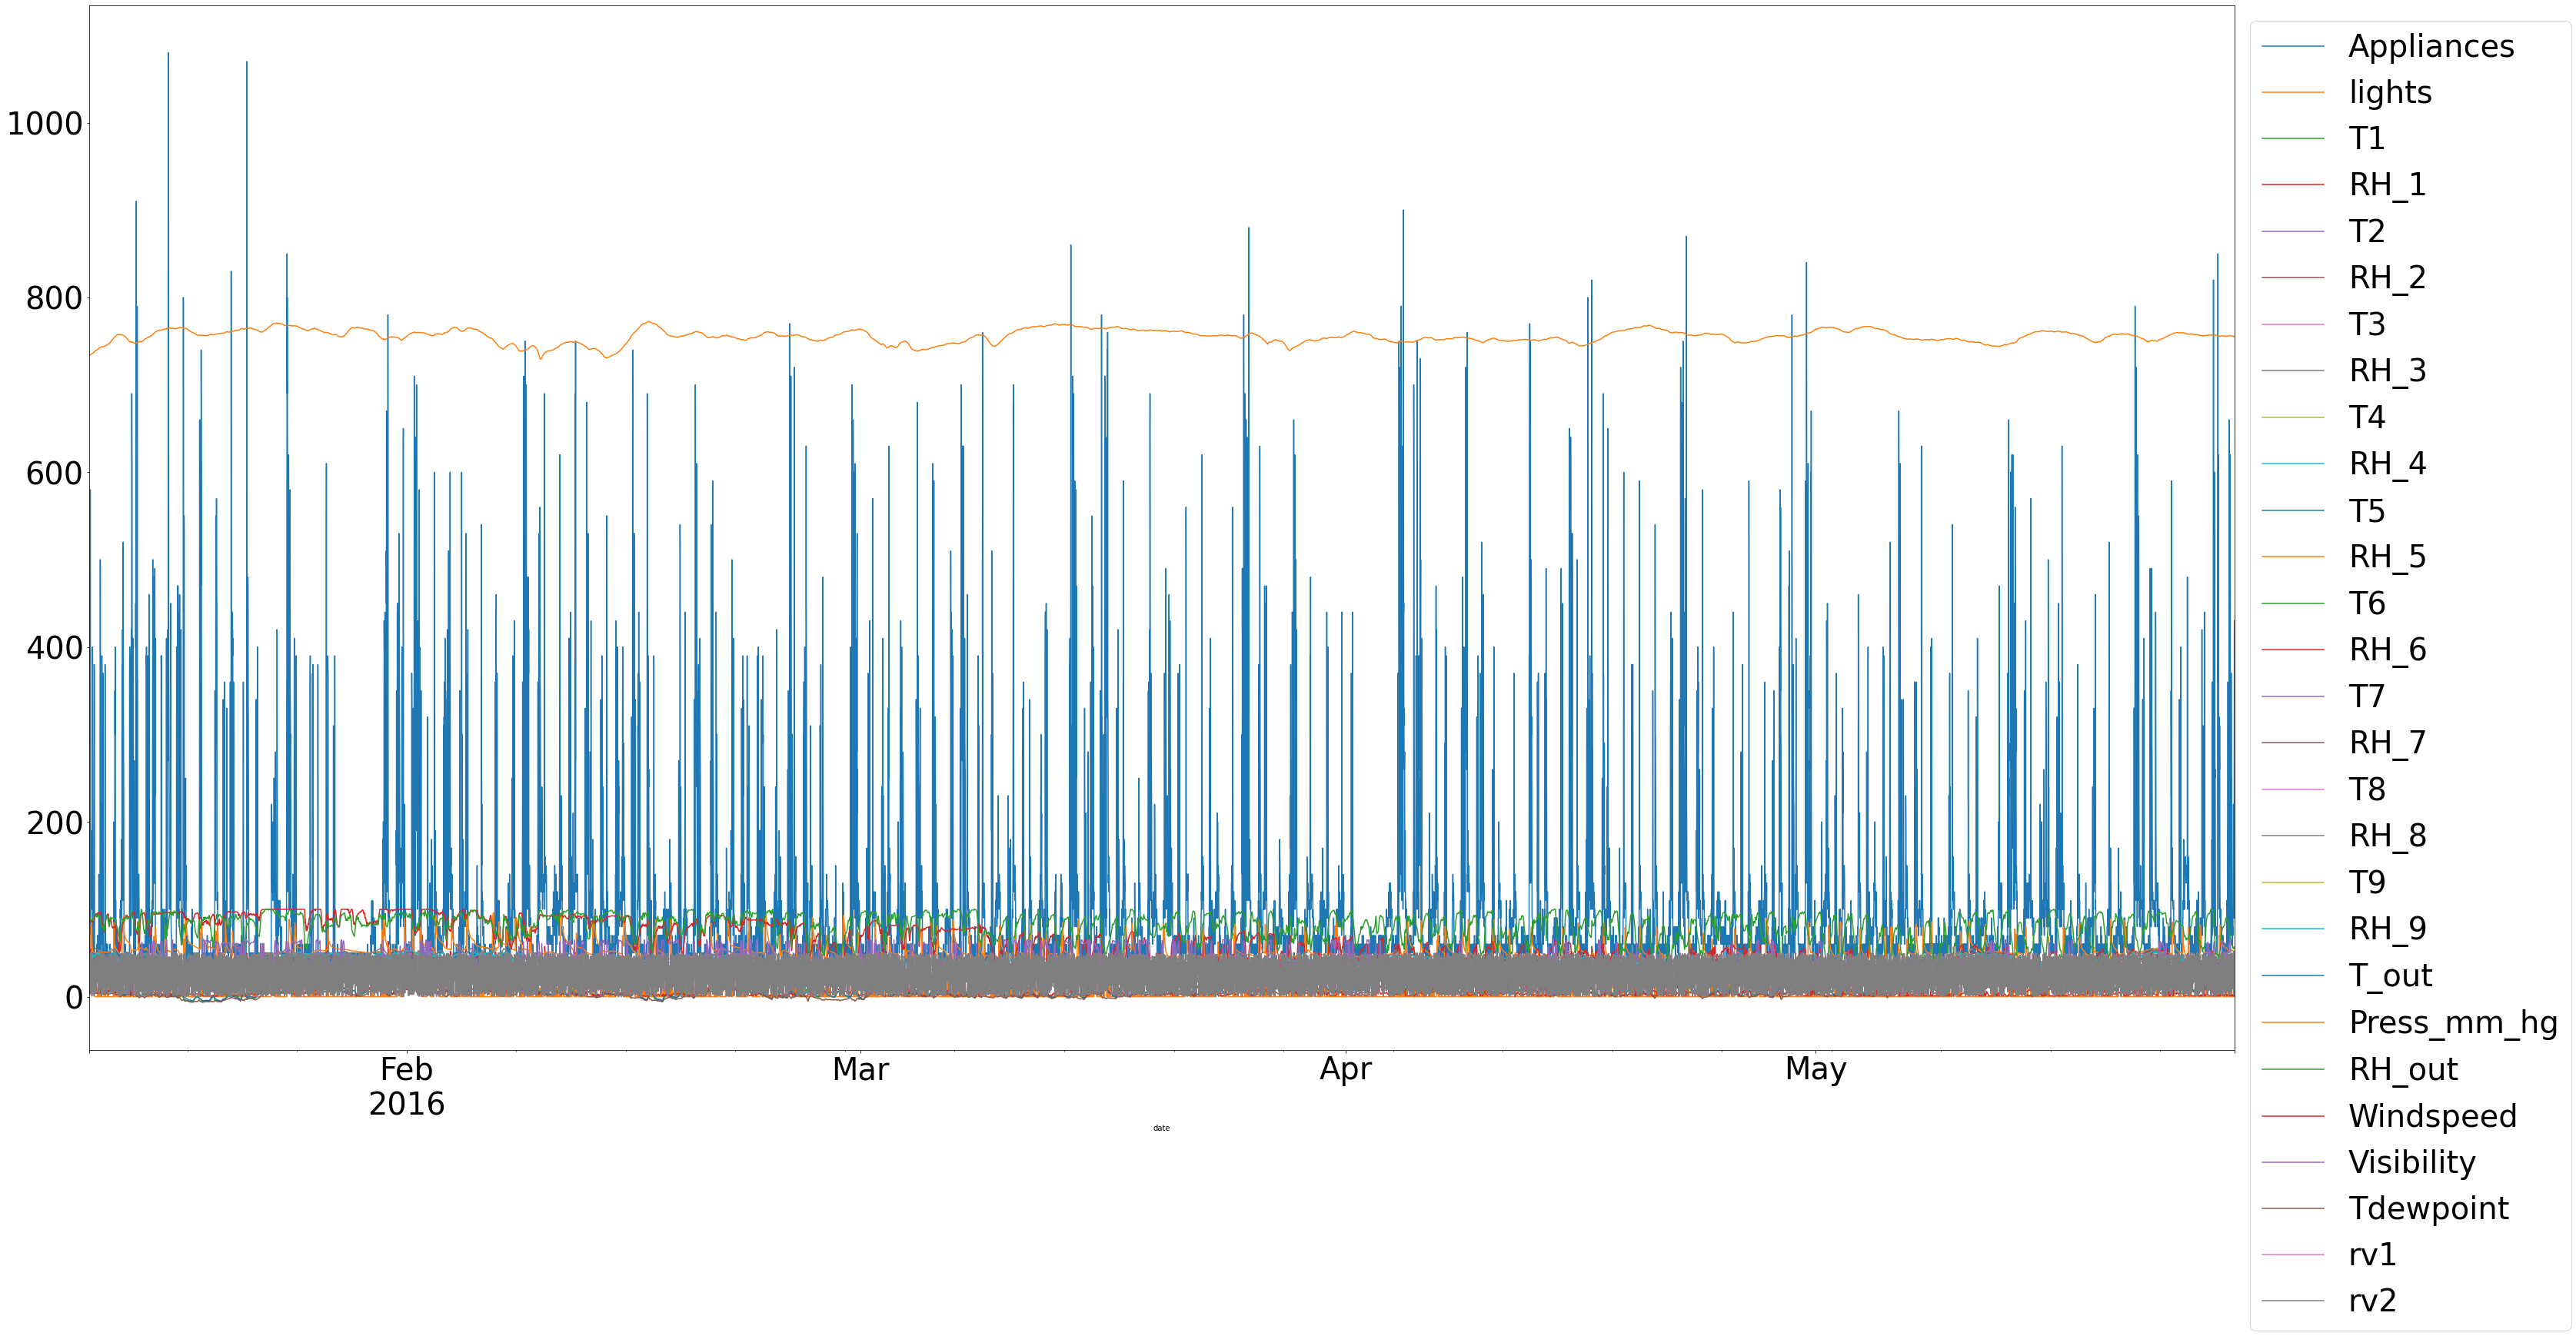

In [10]:
# creating a timeseries plot
df.iloc[:].plot(figsize = (50,25), fontsize = 40)
plt.legend(bbox_to_anchor=(1, 1), prop={'size': 40})

The chart is not useful as the variables have different scales due to different units of measurement, and different magnitudes.
This can be mitigated by standardizing or scaling the data first. This will be done in a later stage.

Next steps:
1. Check for Null values and mitigate
2. Check for outliers and mitigate
3. Replace Null values with mean()
4. Check for correlation between the features and mitigate, and correlation of independent variables with the dependent variable

### 1. Null Values

In [11]:
# checking if null values exist in the columns
df.isna().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

As no null value is present in all of the columns, no further action is necessary regarding mitigation of null values.

### 2. Outliers

Investigation of outliers will be done through using box plots and kurtosis

In [12]:
# checking for outliers
# considering kurtosis values greater than +/-3 indicates presence of outliers
df.kurt()

Appliances     13.667863
lights          4.462147
T1              0.161601
RH_1            0.112629
T2              0.933397
RH_2            0.670959
T3             -0.007055
RH_3           -0.583126
T4             -0.037633
RH_4           -0.613967
T5              0.112724
RH_5            4.503391
T6              0.425549
RH_6           -1.142064
T7             -0.461165
RH_7           -0.544889
T8             -0.158742
RH_8           -0.481962
T9             -0.324625
RH_9           -0.405540
T_out           0.364291
Press_mm_hg     0.071831
RH_out          0.256859
Windspeed       0.250030
Visibility      0.165818
Tdewpoint      -0.124519
rv1            -1.205697
rv2            -1.205697
dtype: float64

It can be seen that `Appliances`, `lights` and `RH5` have outliers as the kurtosis values are greater than 3.

Violin plots will then be plotted next as a second check:

In [13]:
columns = list(df.columns)[:-2]

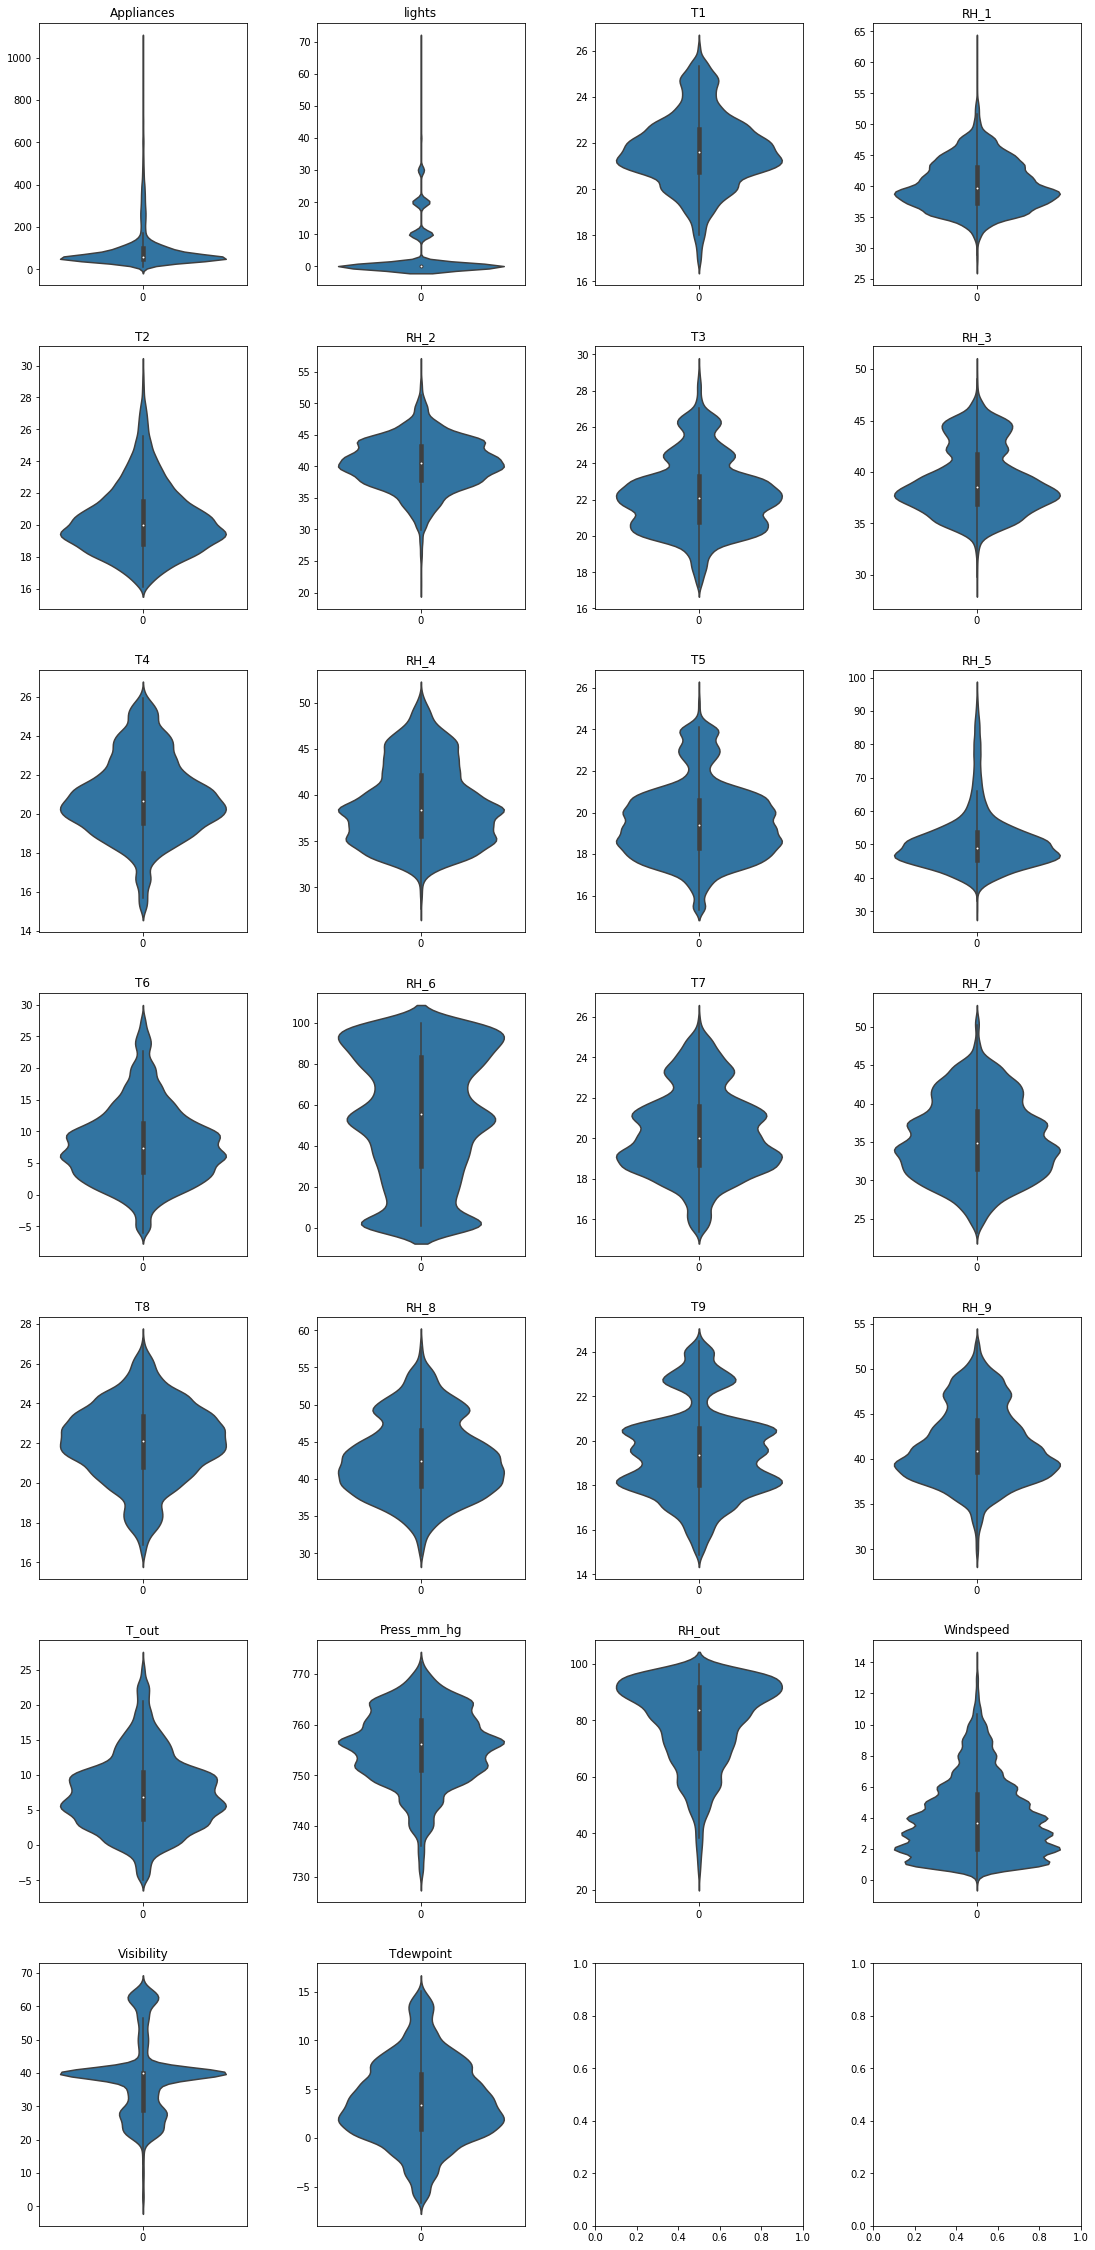

In [14]:
# plotting of violin plots to visually investigate outliers

#df.boxplot(column = "Appliances", by=None, ax=None, fontsize = None, rot=90, grid=True, figsize=None, layout=None, return_type=None, backend=None)
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(16, 32))
# adjust subplots' spacing so titles and xlabels don't overlap by adjusting the pad values
fig.tight_layout(pad=4, h_pad=None, w_pad=None, rect=None)

col = 0
for axs in axes:
    for ax in axs:
        #violin plots using seaborn library
        sns.violinplot(data = list(df[columns[col]]), ax = ax)

        # violin plots using matplotlib library
        # ax.violinplot(list(df[columns[col]]), positions = None, vert = True, 
        #                     widths = 0.5, showmeans = False, showextrema = True, 
        #                     showmedians = False, quantiles = [0.25, 0.50, 0.75], points = 100, 
        #                     bw_method = 'silverman', data = None)
        
        ax.set_title(columns[col])
        col = col + 1
        if col == len(columns):
            break

plt.show()

From the violin plots, it is very clear that outliers are present in the `Appliances`, `RH_5` and `lights` features. This decision is based on the fact that the lower/upper adjacent values (the black lines stretched from the bar) — defined as (first quartile — 1.5 IQR) and (third quartile + 1.5 IQR) respectively can be used in a simple outlier detection technique (Tukey’s fences). Observations lying outside of these “fences” can be considered outliers.

The presence of outliers in `RH_1` is not certain.

Minimal outlier proportion was observed in the other features.

<img src=https://miro.medium.com/max/786/1*TTMOaNG1o4PgQd-e8LurMg.png alt="image info" />

Outlier values in features are supposed to be replaced by NaN values in readiness for the next step: Replacing Null values with means.

* First, we will determine the `interquartile range` (IQR), `first quartile` (1stQ) and `third quartile` (3rdQ).
* Second, we will determine the values in a feature that are less than `(1stQ - IQR)` and those more than `(3rdQ + IQR)`
* Third, replace the determined values with `Nan` values

In [15]:
# considering IQR = 3rdQ - 1stQ
columns = ["Appliances", "RH_5", "lights"]

"""
for c in columns:
    #determining 3rdQ and 1stQ
    quant = list(df[c].quantile([0.25,0.75]))
    thirdQ = quant[1]
    firstQ = quant[0]
    # therefore IQR,
    IQR = thirdQ - firstQ
    # therefore the limits,
    lowerLimit = firstQ - IQR
    upperLimit = thirdQ + IQR
    #determining values above and lower than the limits
    df[c][df[c] < lowerLimit] = np.NaN
    df[c][df[c] > upperLimit] = np.NaN
"""

'\nfor c in columns:\n    #determining 3rdQ and 1stQ\n    quant = list(df[c].quantile([0.25,0.75]))\n    thirdQ = quant[1]\n    firstQ = quant[0]\n    # therefore IQR,\n    IQR = thirdQ - firstQ\n    # therefore the limits,\n    lowerLimit = firstQ - IQR\n    upperLimit = thirdQ + IQR\n    #determining values above and lower than the limits\n    df[c][df[c] < lowerLimit] = np.NaN\n    df[c][df[c] > upperLimit] = np.NaN\n'

### 3. Replace with Null

In [16]:
# df.fillna(df.mean(), inplace = True)

### 4. Correlation of Features

In [17]:
# checking the level of correlation between the features
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


<AxesSubplot:>

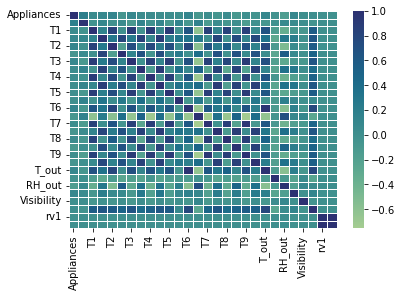

In [18]:
sns.heatmap(df[df.columns].corr(),cmap="crest", linewidths=1)

## FEATURE ENGINEERING

Steps:
* Data scaling
* Apply regularization for variable selection

In [19]:
df_feng = df.copy()

### Normalization

Scaling data is a critical step to regularisation as the penalty on particular coefficients in regularisation techniques namely L1 and L2, depends largely on the scale associated with the variables. Regularisation puts constraints on the size of the coefficients related to each variable. Therefore, rescaling is very important for methods with regularisation because the size of the variables affects how much regularisation will be applied to that specific variable. So to make it fair, we need to get all the features on the same scale.
* Min-max normalization: Guarantees all features will have the exact same scale but does not handle outliers well.
* Z-score normalization: Handles outliers, but does not produce normalized data with the exact same scale.

Of the two common scaling techniques, Standardisation (z-score standardisation) handles outliers gracefully compared to normalization (squeezing data into the range of [0,1]). Therefore, we will implement Standardization.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#getting the independent variables by eliminating the last two columns
cols = df_feng.columns[:-2]
# separating the independent variables from the dependent variables
X = df_feng[cols]

In [22]:
# creating a scaler object
scaler = StandardScaler()
# creating scaled version of the predictors only
X_scaled = scaler.fit_transform(X)
# convert the scaled predictor values into a dataframe
X_standardised = pd.DataFrame(X_scaled,columns = cols)
X_standardised.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,...,-1.957509,1.141572,-1.217324,0.958136,-0.152647,-2.976328,0.82208,1.207694,2.091596,0.366975
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,...,-1.957509,1.134554,-1.200778,0.965363,-0.174588,-2.962813,0.82208,1.071703,1.766584,0.343135
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,...,-1.957509,1.109032,-1.233869,0.950910,-0.196529,-2.949298,0.82208,0.935713,1.441572,0.319294
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,...,-2.008631,1.082233,-1.233869,0.926821,-0.218470,-2.935783,0.82208,0.799723,1.116559,0.295454
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,...,-2.008631,1.082233,-1.233869,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.791547,0.271613


It can be seen that the variance within each variable in the data is now equal to one, as was intended.

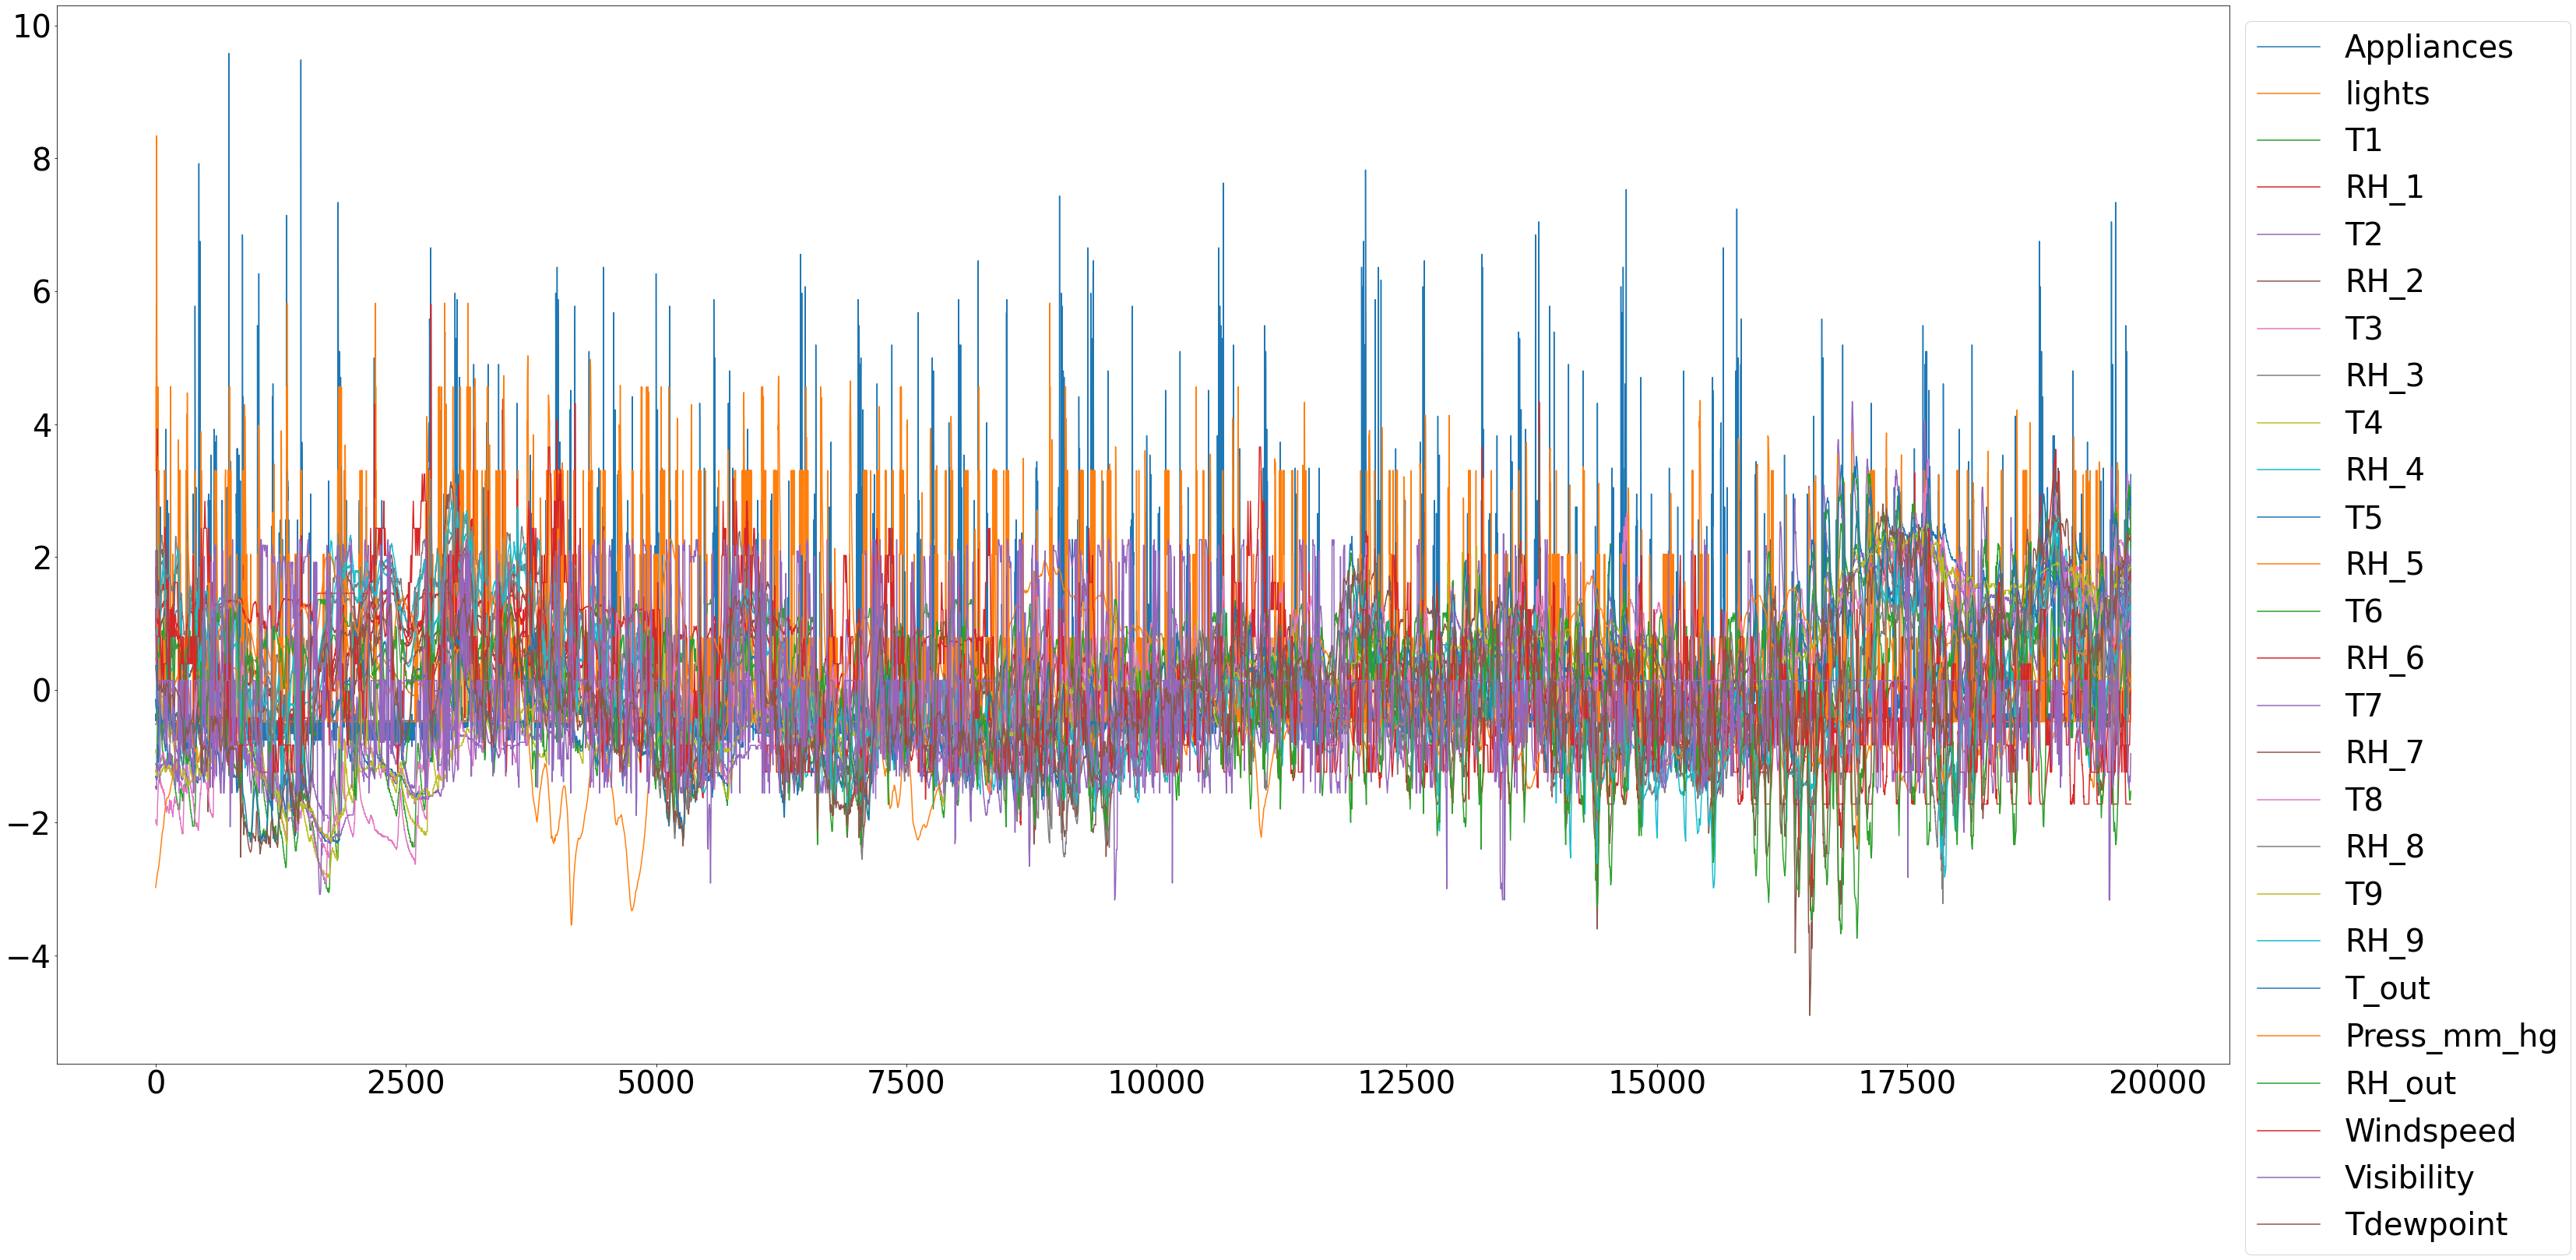

In [23]:
# creating a timeseries plot
X_standardised.iloc[:].plot(figsize = (50,25), fontsize = 40)
plt.legend(bbox_to_anchor=(1, 1), prop={'size': 40})

In [24]:
X_standardised.describe().loc["std"]

Appliances     1.000025
lights         1.000025
T1             1.000025
RH_1           1.000025
T2             1.000025
RH_2           1.000025
T3             1.000025
RH_3           1.000025
T4             1.000025
RH_4           1.000025
T5             1.000025
RH_5           1.000025
T6             1.000025
RH_6           1.000025
T7             1.000025
RH_7           1.000025
T8             1.000025
RH_8           1.000025
T9             1.000025
RH_9           1.000025
T_out          1.000025
Press_mm_hg    1.000025
RH_out         1.000025
Windspeed      1.000025
Visibility     1.000025
Tdewpoint      1.000025
Name: std, dtype: float64

### Regularization

When performing variable selection as we may have in previous trains, manual variable selection is often performed to improve the predictive accuracy of a model. The process of variable selection is discrete in that we either keep a variable, or we throw it away.

Regularisation offers an alternative method in which all predictor variables are included, but are subject to constraint.
Techniques that will be considered are:
* Ridge regression
* LASSO regression
* Elastic net regression
* 

In [25]:
# as the data is a timeseries, splitting the data into train and test sets
# train:test split = 75:25
y = df["rv1"]
l = len(X_standardised)
X_train = X_standardised[:int(0.75*l)]
X_test = X_standardised[int(0.75*l):]
y_train = y[:int(0.75*l)]
y_test = y[int(0.75*l):]

In [61]:
"""
    accuracy_measures: Function to determine accuracy measures of a model
    @algorithm - <string> variable for the name of the algorithm being implemented
    @Y_train_actual - <np.array or list> values of the label variable in the training set
    @Y_train_prediction - <np.array or list> predicted values from the training independent variables
    @Y_test_actual - <np.array or list> values of the label variable in the testing set
    @Y_test_predicted - <np.array or list> predicted dependent variables from the test set's independent variables

    return: a dictionary of the train and test accuracy values

"""
def accuracy_measures(algorithm, intercept, Y_train_actual, Y_train_prediction, Y_test_actual, Y_test_prediction):

    #checking accuracy of training set
    MSE_train_lm = mean_squared_error(Y_train_actual, Y_train_prediction)
    MAE_train_lm = mean_absolute_error(Y_train_actual, Y_train_prediction)
    df_RSS_train = pd.DataFrame()
    df_RSS_train = pd.DataFrame({'Actual': Y_train_actual, 'Predicted': Y_train_prediction})
    RSS_train_lm = np.sum(np.square(df_RSS_train['Predicted'] - df_RSS_train['Actual']))
    R2_train_lm = r2_score(Y_train_actual, Y_train_prediction)

    #checking accuracy of testing set
    MSE_test_lm = mean_squared_error(Y_test_actual, Y_test_prediction)
    MAE_test_lm = mean_absolute_error(Y_test_actual, Y_test_prediction)
    df_RSS_test = pd.DataFrame()
    df_RSS_test = pd.DataFrame({'Actual': Y_test_actual, 'Predicted': Y_test_prediction})
    RSS_test_lm = np.sum(np.square(df_RSS_test['Predicted'] - df_RSS_test['Actual']))
    R2_test_lm = r2_score(Y_test_actual, Y_test_prediction)

    #logging of metrics to comet.ml
    metrics_score = {"Train MSE": [MSE_train_lm], "Train MAE": [MAE_train_lm], 
            "Train RSS": [RSS_train_lm], "Train R2": [R2_train_lm], "Test MSE": [MSE_test_lm], "Test MAE": [MAE_test_lm], 
            "Test RSS": [RSS_test_lm], "Test R2": [R2_test_lm]}
    experiment.log_metrics(metrics_score, prefix = algorithm)
    
    #Outputting the results
    print(algorithm,":\n\tIntercept: ", intercept)
    print("\tMean Squared Error score (lower is better):\n\t\t1. Train set: ",MSE_train_lm,"\n\t\t2. Test set: ", MSE_test_lm)
    print("\tMean Absolute Error score (lower is better):\n\t\t1. Train set: ",MAE_train_lm,"\n\t\t2. Test set: ", MAE_test_lm)
    print("\tResidual Sum of Squares score (lower is better):\n\t\t1. Train set: ",RSS_train_lm,"\n\t\t2. Test set: ", RSS_test_lm)
    print("\tR-Squared score (higher is better):\n\t\t1. Train set: ",R2_train_lm,"\n\t\t2. Test set: ", R2_test_lm)

    # return a dictionary
    return {"algorithm": [algorithm], "intercept": [intercept], "Train MSE": [MSE_train_lm], "Train MAE": [MAE_train_lm], 
            "Train RSS": [RSS_train_lm], "Train R2": [R2_train_lm], "Test MSE": [MSE_test_lm], "Test MAE": [MAE_test_lm], 
            "Test RSS": [RSS_test_lm], "Test R2": [R2_test_lm]}
    
    #return [algorithm, MSE_train_lm, MAE_train_lm, RSS_train_lm, RSS_train_lm, 
    #        MSE_test_lm, MAE_test_lm, RSS_test_lm, RSS_test_lm]

# list of train and test accuracy measures columns

df_accuracy = pd.DataFrame()

#### a) Linear Regression - Minimum Viable Model

Before regularization, we will prepare a Minimum Viable Model, and use the accuracy metric to compare with the performance of the regressors below.

In [62]:
# importing metrics module and linear model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

In [63]:
# creating model object
lm = LinearRegression()
# training linear model
lm.fit(X_train, y_train)
# Extracting intercept from model
intercept_lm = float(lm.intercept_)
print("Intercept: ", float(intercept_lm))
# Extracting coefficients from the model
coeff_lm = pd.DataFrame(lm.coef_, cols, columns = ["Coefficient"])


Intercept:  25.123171258792805


In [64]:
coeff_lm

,Coefficient
Appliances,-0.061778
lights,0.036974
T1,-0.266222
RH_1,0.110941
T2,0.492970
RH_2,-0.123857
T3,0.150138
RH_3,-0.242836
T4,0.146295
RH_4,-0.140947


In [65]:
# generating predictions of the dependent variable on training set
train_pred = lm.predict(X_train)
#checking accuracy of testing set
test_pred = lm.predict(X_test)

lm_accuracy = accuracy_measures("Linear Regression", intercept_lm, y_train, train_pred, y_test, test_pred)
df_accuracy = pd.concat([df_accuracy, pd.DataFrame(lm_accuracy)])

Linear Regression :
	Intercept:  25.123171258792805
	Mean Squared Error score (lower is better):
		1. Train set:  210.15689590756722 
		2. Test set:  210.28717503888814
	Mean Absolute Error score (lower is better):
		1. Train set:  12.559435311239648 
		2. Test set:  12.535106126369083
	Residual Sum of Squares score (lower is better):
		1. Train set:  3110532.2163279024 
		2. Test set:  1037556.9216418741
	R-Squared score (higher is better):
		1. Train set:  0.001427140542722305 
		2. Test set:  -0.005219874474527764


In practice, R2 will be negative whenever a model's predictions are worse than a constant function that always predicts the mean of the data. It can happen because of various reasons like small dataset and noise in the dataset. It basically means that the fit is actually worse than just fitting a horizontal line.

Mitigation:
* Adding a constant term to the model

#### b) Ridge Regression

In [66]:
# importing the ridge regression module from sklearn
from sklearn.linear_model import Ridge

In [67]:
# creating ridge model
ridge = Ridge(alpha = 0.5)
# training the model
ridge.fit(X_train, y_train)
# extracting the model intercept value
b0 = float(ridge.intercept_)
# Extracting intercept from model
intercept_ridge = float(ridge.intercept_)
print("Intercept: ", float(intercept_ridge))
# extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, cols, columns = ['Coefficients'])

Intercept:  25.12258545039538


In [68]:
coeff

,Coefficients
Appliances,-0.061917
lights,0.036887
T1,-0.265195
RH_1,0.111080
T2,0.490688
RH_2,-0.126598
T3,0.149631
RH_3,-0.241016
T4,0.146623
RH_4,-0.141065


As we had standardised the values, we can compare the coefficients. The higher the absolute coefficient value, the higher the importance of the variable.

In [69]:
# generating predictions of the dependent variable on training set
train_pred = ridge.predict(X_train)
#checking accuracy of testing set
test_pred = ridge.predict(X_test)

ridge_accuracy = accuracy_measures("Ridge Regression", intercept_ridge, y_train, train_pred, y_test, test_pred)
df_accuracy = pd.concat([df_accuracy, pd.DataFrame(ridge_accuracy)])

Ridge Regression :
	Intercept:  25.12258545039538
	Mean Squared Error score (lower is better):
		1. Train set:  210.15690979231522 
		2. Test set:  210.26620278053045
	Mean Absolute Error score (lower is better):
		1. Train set:  12.559450178536698 
		2. Test set:  12.534412271866083
	Residual Sum of Squares score (lower is better):
		1. Train set:  3110532.4218360577 
		2. Test set:  1037453.4445191373
	R-Squared score (higher is better):
		1. Train set:  0.0014270745685249775 
		2. Test set:  -0.0051196223744656155


#### c) LASSO Regression

In [70]:
# importing LASSO module
from sklearn.linear_model import Lasso

In [71]:
# creating LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha = 0.01)
# training the LASSO model
lasso.fit(X_train, y_train)
# Extracting the intercept from the model
intercept_lasso = float(lasso.intercept_)
print("Intercept: ", float(intercept_lasso))
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, cols, columns=['Coefficient'])

Intercept:  25.05471097567497


In [72]:
coeff

,Coefficient
Appliances,-0.055349
lights,0.000000
T1,-0.000000
RH_1,0.000000
T2,0.097452
RH_2,-0.177072
T3,0.000000
RH_3,-0.010279
T4,0.197799
RH_4,-0.011669


In [73]:
# generating predictions of the dependent variable on training set
train_pred = lasso.predict(X_train)
#checking accuracy of testing set
test_pred = lasso.predict(X_test)

lasso_accuracy = accuracy_measures("LASSO Regression", intercept_lasso, y_train, train_pred, y_test, test_pred)
df_accuracy = pd.concat([df_accuracy, pd.DataFrame(lasso_accuracy)])

LASSO Regression :
	Intercept:  25.05471097567497
	Mean Squared Error score (lower is better):
		1. Train set:  210.21223530712365 
		2. Test set:  209.3156864921476
	Mean Absolute Error score (lower is better):
		1. Train set:  12.56315061928536 
		2. Test set:  12.505806834067377
	Residual Sum of Squares score (lower is better):
		1. Train set:  3111351.2947807373 
		2. Test set:  1032763.5971522562
	R-Squared score (higher is better):
		1. Train set:  0.0011641921287905976 
		2. Test set:  -0.000575941268294855


#### d) Elasticnet Regression

In [74]:
# importing ElasticNet module
from sklearn.linear_model import ElasticNet

In [75]:
# creating elstic net model object, with alpha at 1.0
elastic = ElasticNet(alpha = 1.0, l1_ratio = 0.5)
# fitting model to the dataset
elastic.fit(X_train, y_train)
# Extracting the intercept from the model
intercept_elastic = float(elastic.intercept_)
print("Intercept: ", intercept_elastic)
# Extracting the coefficients from the model
coeff = pd.DataFrame(elastic.coef_, cols, columns=['Coefficient'])

Intercept:  24.990861166194527


In [76]:
coeff

,Coefficient
Appliances,-0.0
lights,-0.0
T1,-0.0
RH_1,-0.0
T2,-0.0
RH_2,-0.0
T3,-0.0
RH_3,-0.0
T4,0.0
RH_4,-0.0


In [77]:
# generating predictions of the dependent variable on training set
train_pred = elastic.predict(X_train)
#checking accuracy of testing set
test_pred = elastic.predict(X_test)

elastic_accuracy = accuracy_measures("Elastic Net Regression", intercept_elastic, y_train, train_pred, y_test, test_pred)
df_accuracy = pd.concat([df_accuracy, pd.DataFrame(elastic_accuracy)])

Elastic Net Regression :
	Intercept:  24.990861166194527
	Mean Squared Error score (lower is better):
		1. Train set:  210.45724797866734 
		2. Test set:  209.19533026151603
	Mean Absolute Error score (lower is better):
		1. Train set:  12.572084405346631 
		2. Test set:  12.508499415193697
	Residual Sum of Squares score (lower is better):
		1. Train set:  3114977.7273322553 
		2. Test set:  1032169.7595103201
	R-Squared score (higher is better):
		1. Train set:  0.0 
		2. Test set:  -6.11484035406562e-07


#### Summary

The performance of the different models are shown below:

In [78]:
df_accuracy = df_accuracy.set_index("algorithm")
df_accuracy

,intercept,Train MSE,Train MAE,Train RSS,Train R2,Test MSE,Test MAE,Test RSS,Test R2
algorithm,,,,,,,,,
Linear Regression,25.123171,210.156896,12.559435,3.110532e+06,0.001427,210.287175,12.535106,1.037557e+06,-5.219874e-03
Ridge Regression,25.122585,210.156910,12.559450,3.110532e+06,0.001427,210.266203,12.534412,1.037453e+06,-5.119622e-03
LASSO Regression,25.054711,210.212235,12.563151,3.111351e+06,0.001164,209.315686,12.505807,1.032764e+06,-5.759413e-04
Elastic Net Regression,24.990861,210.457248,12.572084,3.114978e+06,0.000000,209.195330,12.508499,1.032170e+06,-6.114840e-07


In [79]:
# plt.plot(df_accuracy_normalised.transpose())
# plt.xticks(rotation=90)
# plt.legend(algorithms, bbox_to_anchor=(1, 1))
# plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

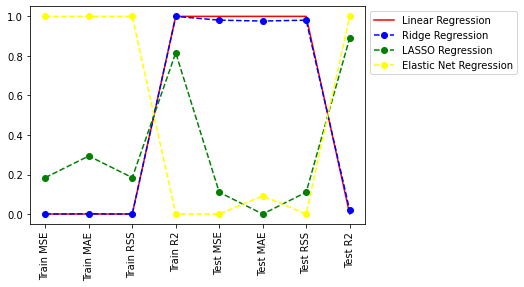

In [80]:
# getting columns of interest
scores = df_accuracy.columns[1:]
# Scaling of data
scaler = MinMaxScaler()
normalized = scaler.fit_transform(df_accuracy[scores])
df_accuracy_normalised = pd.DataFrame(normalized, columns = scores, index =["Linear Regression", "Ridge Regression","LASSO Regression","Elastic Net Regression"] )
# plotting the normalised scores
#plt.title("")

plt.plot(title ="Comparison of Performance Between Regularization Algorithms")
plt.plot(df_accuracy_normalised.loc["Linear Regression"], color = 'red', linestyle = "solid")
plt.plot(df_accuracy_normalised.loc["Ridge Regression"], color = 'blue', marker = 'o', linestyle = "dashed")
plt.plot(df_accuracy_normalised.loc["LASSO Regression"], color = 'green', marker = 'o', linestyle = "dashed")
plt.plot(df_accuracy_normalised.loc["Elastic Net Regression"], color = 'yellow', marker = 'o', linestyle = "dashed")
plt.xticks(rotation=90)

plt.legend(["Linear Regression", "Ridge Regression","LASSO Regression","Elastic Net Regression"], bbox_to_anchor=(1, 1))
plt.show

In [81]:
# algorithms = df_accuracy_normalised.transpose().reset_index().columns[1:]
# df_accuracy_normalised.transpose().reset_index().plot.bar(x = algorithms,
#             rot = 90,
#             figsize = (10,4), # Figsize to make the plot larger
#             title = 'Comparison of Performance of Regularization Algorithms', # Adding a title to the top
#             xlabel = "SF Restaurants", # Adding a label on the xaxis
#             ylabel="AvgBill", # Adding a label on y axis
#             fontsize='large'); # Making my ticks a bit bigger
# plt.legend(scores, bbox_to_anchor=(1, 1))
# plt.show()

Linear Regression has the best performance on training set, while Elastic Net Regression has the best performance on the test set.

### Hyper-Parameter Tuning

A hyperparameter is a variable or argument whose value is set before the training process begins. In contrast, parameters are those values derived via training. Different model training algorithms require different hyperparameters, and some simple algorithms require none.

Techniques include:
* Grid search
* Random search
* Coarse-to-fine tuning
* Bayesian optimization
* Gradient-based optimization
* Evolutionary optimization

a) Grid Search

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold

In [109]:
# defining the parameter grid range
param_Grid = {"max_iter": [1, 5, 10,15,20,50,100],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# creating an instance of GridSearchCV, KNN being the model type
scores = ['r2',  'neg_mean_absolute_error']
df_hyperparam = pd.DataFrame()
for score in scores:
    grid_knn = GridSearchCV(ElasticNet(), param_Grid, scoring = score, n_jobs = -1, cv = cv)
    # fitting the GridSearch model to the training data
    result = grid_knn.fit(X_train, y_train)
    # printing out the best parameter values
    print("Using Grid Search, the following are the best score and best hypeparameter values for elastic net regression model:")
    print("\tBest parameters: ",grid_knn.best_params_)
    print("\t",score, ": ", result.best_score_)
    alpha_Grid = grid_knn.best_params_["alpha"]
    l1_ratio_Grid = grid_knn.best_params_["l1_ratio"]
    max_iter_Grid = grid_knn.best_params_["max_iter"]
    hyperparam = {"algorithm": ["GridSearchCV"],
                    "score": [score],
                    "alpha": [alpha_Grid],
                    "l1_ratio": [l1_ratio_Grid],
                    "maximum iteration": [max_iter_Grid]}
    
    df_hyperparam = pd.concat([df_hyperparam, pd.DataFrame(hyperparam)])

COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


Using Grid Search, the following are the best score and best hypeparameter values for elastic net regression model:
	Best parameters:  {'alpha': 1, 'l1_ratio': 0.4, 'max_iter': 1}
	 r2 :  -0.0006956170046161115


COMET ERROR: Failed to extract parameters from estimator


Using Grid Search, the following are the best score and best hypeparameter values for elastic net regression model:
	Best parameters:  {'alpha': 1, 'l1_ratio': 0.4, 'max_iter': 1}
	 neg_mean_absolute_error :  -12.572926711563067


In [114]:
# creating elastic net model object, with alpha at 1.0
elastic_Grid = ElasticNet(alpha = 1.0, l1_ratio = 0.1, max_iter= 100)
# fitting model to the dataset
elastic_Grid.fit(X_train, y_train)
# Extracting the intercept from the model
intercept_elastic = float(elastic_Grid.intercept_)
print("Intercept: ", intercept_elastic)
# Extracting the coefficients from the model
coeff = pd.DataFrame(elastic_Grid.coef_, cols, columns=['Coefficient'])

Intercept:  24.996059851452916


In [115]:
# generating predictions of the dependent variable on training set
train_pred = elastic_Grid.predict(X_train)
#checking accuracy of testing set
test_pred = elastic_Grid.predict(X_test)

elastic_accuracy = accuracy_measures("Elastic Net Regression_Grid", intercept_elastic, y_train, train_pred, y_test, test_pred)
df_accuracy = pd.concat([df_accuracy, pd.DataFrame(elastic_accuracy)])

Elastic Net Regression_Grid :
	Intercept:  24.996059851452916
	Mean Squared Error score (lower is better):
		1. Train set:  210.39676416083725 
		2. Test set:  209.1624112623658
	Mean Absolute Error score (lower is better):
		1. Train set:  12.570055954190003 
		2. Test set:  12.506549370921975
	Residual Sum of Squares score (lower is better):
		1. Train set:  3114082.506344552 
		2. Test set:  1032007.3371685129
	R-Squared score (higher is better):
		1. Train set:  0.0002873924201280964 
		2. Test set:  0.0001567487172585702


#### b) Random Search

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [120]:
# defining the parameter grid range
param_Grid = {"max_iter": [1, 5, 10,15,20,50,100],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}
# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# creating an instance of GridSearchCV, KNN being the model type
scores = ['r2',  'neg_mean_absolute_error']

for score in scores:
    randomCV = RandomizedSearchCV(ElasticNet(), param_Grid, scoring = score, n_jobs = -1, cv = cv)
    # fitting the GridSearch model to the training data
    result = randomCV.fit(X_train, y_train)
    # printing out the best parameter values
    print("Using Randomized Search, the following are the best score and best hyperparameter values for elastic net regression model:")
    print("\tBest parameters: ", randomCV.best_params_)
    print("\t",score, ": ", result.best_score_)
    alpha_Grid = randomCV.best_params_["alpha"]
    l1_ratio_Grid = randomCV.best_params_["l1_ratio"]
    max_iter_Grid = randomCV.best_params_["max_iter"]
    hyperparam = {"algorithm": ["RandomizedSearchCV"],
                    "score": [score],
                    "alpha": [alpha_Grid],
                    "l1_ratio": [l1_ratio_Grid],
                    "maximum iteration": [max_iter_Grid]}
    
    df_hyperparam = pd.concat([df_hyperparam, pd.DataFrame(hyperparam)])

COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


Using Randomized Search, the following are the best score and best hyperparameter values for elastic net regression model:
	Best parameters:  {'max_iter': 100, 'l1_ratio': 0.6000000000000001, 'alpha': 10}
	 r2 :  -0.0006956170046161115


COMET ERROR: Failed to extract parameters from estimator


Using Randomized Search, the following are the best score and best hyperparameter values for elastic net regression model:
	Best parameters:  {'max_iter': 1, 'l1_ratio': 0.8, 'alpha': 1}
	 neg_mean_absolute_error :  -12.572926711563067


#### c) Coarse-to-Fine Tuning

We will start with random search to get a focus area of the hyperparameters, and then use the determined range in grid search to fine tune the hyperparameters

In [86]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/kiomegm/hamoye/21e819d1255842d5b766096e92647663
COMET INFO:   Metrics:
COMET INFO:     Elastic Net Regression_Test MAE  : 12.508499415193697
COMET INFO:     Elastic Net Regression_Test MSE  : 209.19533026151603
COMET INFO:     Elastic Net Regression_Test R2   : -6.11484035406562e-07
COMET INFO:     Elastic Net Regression_Test RSS  : 1032169.7595103201
COMET INFO:     Elastic Net Regression_Train MAE : 12.572084405346631
COMET INFO:     Elastic Net Regression_Train MSE : 210.45724797866734
COMET INFO:     Elastic Net Regression_Train R2  : 0.0
COMET INFO:     Elastic Net Regression_Train RSS : 3114977.7273322553
COMET INFO:     GridSearchCV_Test MAE            : 12.508160971642699
COMET INFO:     GridSearchCV_Test MSE            : 209.186777010856